In [32]:
import numpy as np # Импорт библиотеки

In [52]:
"""Генерируем матрицу случайных значений размером 30х30

каждая строка характеризует нормальное состояние

"""
normal_state_generating = np.random.default_rng().normal(0.5, 0.1, size=(30, 30)) 

In [53]:
"""создаем переменную rng - генератор случайных чисел

"""
rng = np.random.default_rng(12345)
print(rng)

Generator(PCG64)


In [54]:
""" генерируем матрицу случайных целых чисел в диапазоне = [0, 20] размером 1х1

"""
rints = rng.integers(low=0, high=29, size=1)
print(rints)

""" Этот блок лишний

"""


[20]


In [36]:
"""Добавляем в уже сгенерированную матрицу нормальных состояний случайно сгенерированные выбросы 

в диапазоне [19.9, 20.01]

"""
for i in range(len(normal_state_generating)):
    rints = rng.integers(low=0, high=29, size=1)
    normal_state_generating[i, rints] = np.random.default_rng().normal(20, 0.1, size=(1, 1))

In [37]:
import pandas as pd # Импорт библиотеки

In [38]:
"""Создаем из имеющегося массива особый тип массива pd.Dataframe

"""
df = pd.DataFrame(normal_state_generating)

<AxesSubplot:>

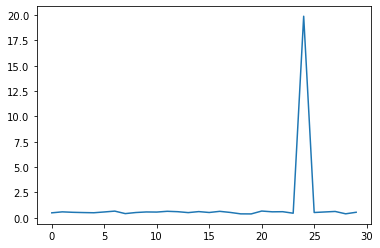

In [39]:
"""Выводим график девятого состояния

"""
z = df.iloc[9,:]
z.plot()

<AxesSubplot:>

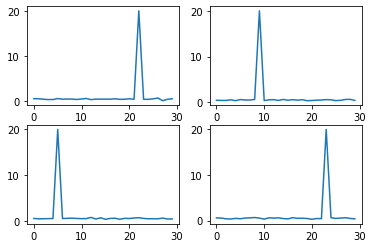

In [40]:
"""Выводим одновременно несколько графиков с состояниями 1-4

"""


import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2)

df.iloc[1,:].plot(ax=axes[0,0])
df.iloc[2,:].plot(ax=axes[0,1])
df.iloc[3,:].plot(ax=axes[1,0])
df.iloc[4,:].plot(ax=axes[1,1])